# Implementation 
Here we will implement perceptron on survival data of passengers aboard the Titanic. Each passenger includes their survivorship status(0 - didn't survive, 1 - survived), and various attributes such as PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked. 



** problem: What attributes to use? **
- I first tried using all the attributes at once, but the result was a mess and definitely not linearly seperatble. I believe this happens because of the mix of catagorical and numerical data, and also variables like PClass and Fare which are roughly transfermations of each other, causing endogeneity and throwing off the numbers. 

- Thus I will be using only 2 attributes at a time. And to see which two would be most useful, I'll first plot each against survival to see how well it predicts.

/var/folders/y5/q7gh66fx2t58smbbcwxps5h40000gn/T/ipykernel_86854/1670033661.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="pastel", legend=False)


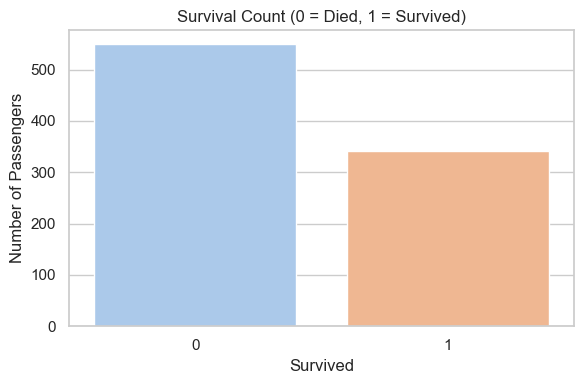

/var/folders/y5/q7gh66fx2t58smbbcwxps5h40000gn/T/ipykernel_86854/1670033661.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Survived", loc="upper right")


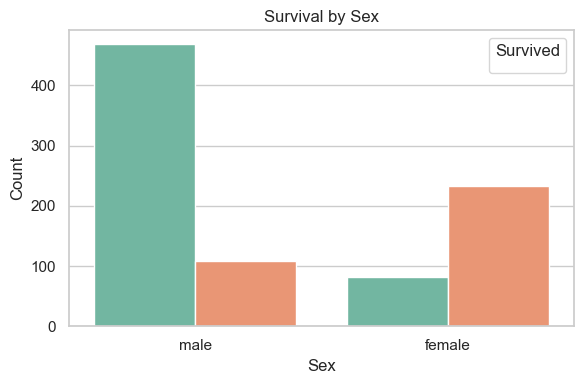

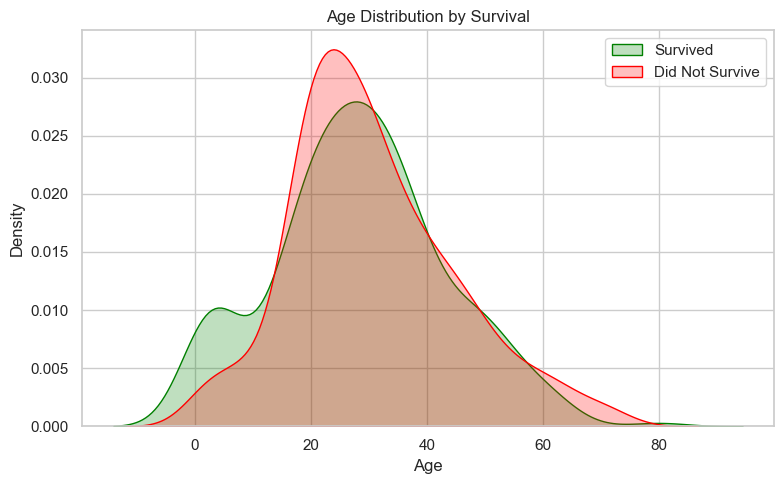

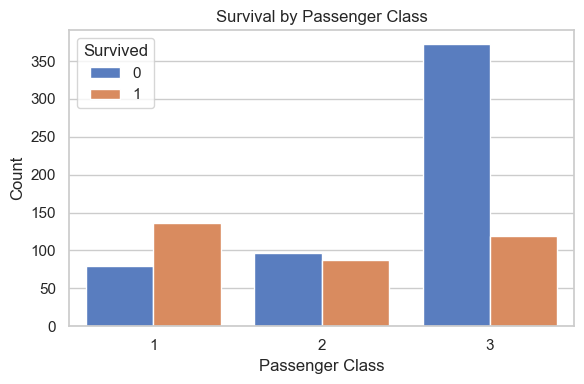

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../../data/Titanic-Dataset.csv")

# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Survived", palette="pastel", legend=False)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

# Plot 2: Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set2",legend=False)
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.tight_layout()
plt.show()

# Plot 3: Age Distribution by Survival
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df["Survived"] == 1], x="Age", label="Survived", fill=True, color="green")
sns.kdeplot(data=df[df["Survived"] == 0], x="Age", label="Did Not Survive", fill=True, color="red")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 4: Class vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="muted")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.tight_layout()
plt.show()


** Remarks **

- Seems like the two biggest factors were Sex, and which class the passenger was in, not suprising as we know  lifeboats were prioritized for women and children, while the higher fare classes had more life boats.

- For class, there are two attributes that can be used: PClass, or Fare directly. Since they are just  transformations of each other. I'll run the analysis for each of them to see how well they each work:

## 1. Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from perceptron_method import Perceptron

# 1.1 Load data, filter for Sex, Pclass, Survived

In [2]:
df = pd.read_csv('../../data/Titanic-Dataset.csv')
df = df[['Sex', 'Pclass', 'Survived']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Sex', 'Pclass']].values
y = df['Survived'].values
y = np.where(y == 1, 1, -1)  # convert to {-1, 1}

# 1.2 Train perception

In [3]:
p = Perceptron(eta=0.5, epochs=50)
p.train(X, y)
preds = p.predict(X)
accuracy = np.mean(preds == y)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.751


# 1.3 Plot output and decision boundary

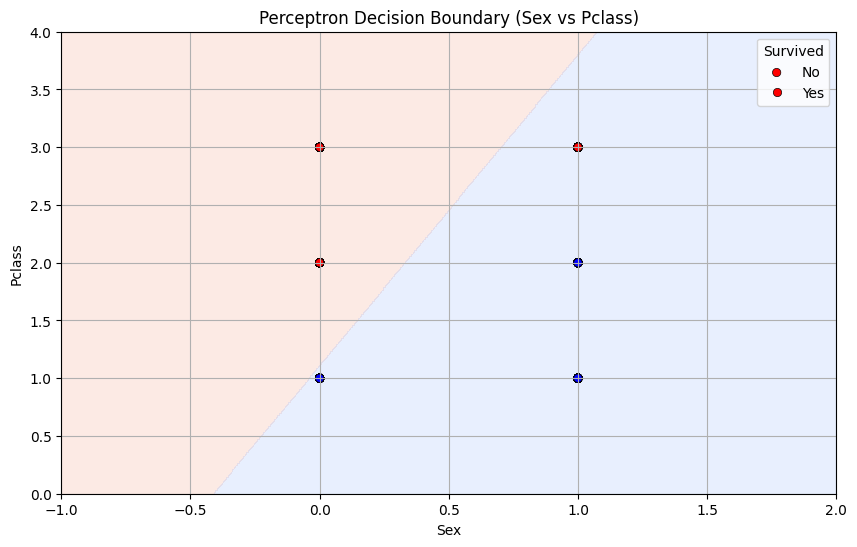

In [ ]:
# Standarizing

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = p.predict(grid).reshape(xx.shape)

# plot

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, levels=1, cmap='coolwarm_r')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette={-1: 'red', 1: 'blue'}, edgecolor='k')
plt.title('Perceptron Decision Boundary (Sex vs Pclass)')
plt.xlabel('Sex')
plt.ylabel('Pclass')
plt.legend(title='Survived', labels=['No','Yes'])
plt.grid(True)
plt.show()

** Remarks **

- Looks more or less reasonable, but the dots definitely looks wonky due to only having 6 unique points created by the combination of 2 sexes and 3 classes. 

- the line isn't a perfect partition of the rectangle due to the points overlapping with each other, thus we'd also want to plot the number of occurances of each point to get a better understanding

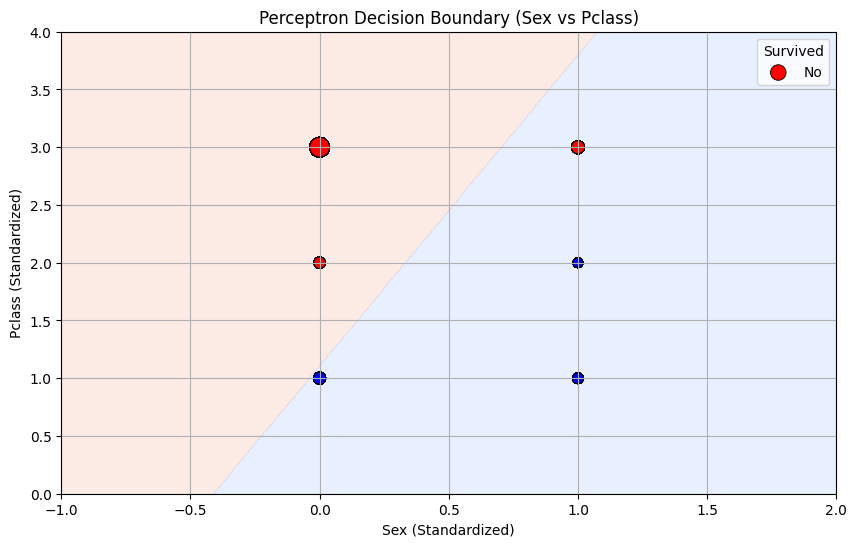

In [ ]:

# Count the occurrences of each combination of 'Sex' and 'Pclass'
counts = df.groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

# Merge counts back to the original DataFrame for correct sizing
df_counts = df.merge(counts, on=['Sex', 'Pclass'])

# --- Step 2: Plot decision boundary
x_min, x_max = df_counts['Sex'].min() - 1, df_counts['Sex'].max() + 1
y_min, y_max = df_counts['Pclass'].min() - 1, df_counts['Pclass'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = p.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 6))

# Contour plot for the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, levels=1, cmap='coolwarm_r')

# --- Step 3: Plot data points, adjusting size based on counts
sns.scatterplot(x=df_counts['Sex'], y=df_counts['Pclass'], hue=df_counts['Survived'],
                size=df_counts['Count'], sizes=(50, 200),  # Size points based on count
                palette={0: 'red', 1: 'blue'}, edgecolor='k', legend=False)

# Labels and title
plt.title('Perceptron Decision Boundary (Sex vs Pclass)')
plt.xlabel('Sex (Standardized)')
plt.ylabel('Pclass (Standardized)')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

** Remarks **

- Now that the points are scaled according to the number of occurances, we see that the line isn't a perfect partition due to the top left points having much more weight than the bottom right corner, thus "dragging" the weighted decision boundary towards it.


# 5. Plot Errors
We'll now plot the errors to see if it varied throughout the epochs

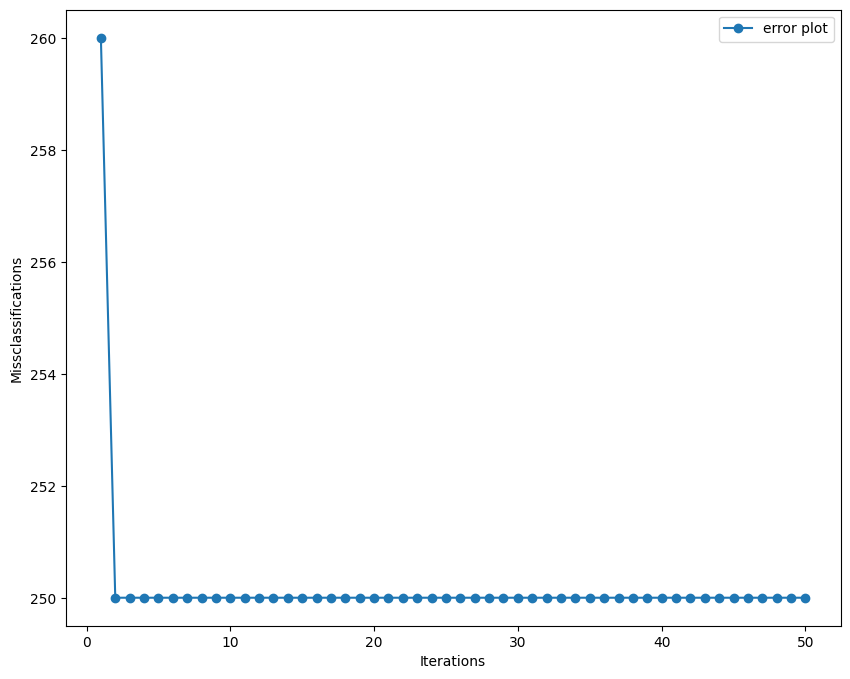

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(p.errors_)+1), p.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()


** Remark **

- seems like the only real changed happened in the first iteration, dropping from 260 

In [ ]:
df = pd.read_csv('../../data/Titanic-Dataset.csv')
df = df[['Sex', 'Fare', 'Survived']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Sex', 'Fare']].values
y = df['Survived'].values
y = np.where(y == 1, 1, -1)  # convert to {-1, 1}